In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import plotly.graph_objects as go
import os
import plotly.io as pio
from visualization import *


# Visualization for Results

In [3]:
font_size = 35
tick_font_size = 25
width = 1200
width_hyper = 1800
height = 400

## 0. Read in Data

In [4]:
# ------------------ Output Path ------------------
output_path = "/Users/elisabeth.ailer/Projects/P14_NonlinearSampleIV/Output"

# ------------------ Experiment Settings ------------------
experiment_name = "1011-standard-gradient-mean"
seed = 4
T = 16
T_exploration = 10
sample_sigma = 0.001

lam_c_list = [0.01, 0.02, 0.04, 0.05, 0.07]
lam_s_list = [0.005, 0.01, 0.05, 0.06, 0.07, 0.1]
step_size_list = [4.0, 1.0, 0.1, 0.01, 0.001] # [4.0, 1.0, 0.1, 0.01, 0.001]
do_sigma_update = ["Y"] # ["Y", "N"]


# --------------------------------------------
# --------------------------------------------

# Create Output Image Path/Folder
image_path = os.path.join(output_path, experiment_name, "images/")
os.makedirs(image_path, exist_ok=True)

# Formatting Options
strategy_type = ["random_sampling", "explore_then_exploit", "continuous_exploration", "adaptive_sampling"]
strategy_name = ["Random",  "Explore-Exploit", "Alternating", "Adaptive"]
dict_name = {"random_sampling": "Random", "explore_then_exploit": "Explore-Exploit", "continuous_exploration": "Alternating", "adaptive_sampling": "Adaptive"}

# Read in results over different hyperparameters
res_overall = dict()
for lam_c in lam_c_list:
    for lam_first in lam_s_list: 
        for s_num, step_size in zip(range(len(step_size_list)), step_size_list):
            for do_update in do_sigma_update:
                folder_name = f"strategy_type-adaptive_sampling_lam_c-{lam_c}_lam_first-{lam_first}_seed-{seed}_T-{T}_T_exploration-{T_exploration}_sample_sigma-{sample_sigma}_do_sigma_update-{do_update}"
                res_name = os.path.join(output_path, experiment_name, folder_name, f"results_seed.npy")
                if os.path.exists(res_name):
                    iteration = 0
                    res, res_seed = load_results(output_path, experiment_name, strategy_type, seed, lam_c, T, T_exploration, sample_sigma, iteration, lam_first, do_update=do_update)
                    res = replace_keys_with_names(res, dict_name)
                    res_seed = replace_keys_with_names(res_seed, dict_name)
                    lower_bounds, upper_bounds, lower_bounds_seeds, upper_bounds_seeds, res_time = load_bounds(res, res_seed, step_size=s_num)
                    try:
                        grad_true = np.repeat(res["Adaptive"]["Grad"].squeeze(), T, axis=0)
                    except:
                        grad_true = None
                    res_overall[(lam_c, lam_first, step_size)] = {"res": res, "res_seed": res_seed, "lower_bounds": lower_bounds, "upper_bounds": upper_bounds, "lower_bounds_seeds": lower_bounds_seeds, "upper_bounds_seeds": upper_bounds_seeds, "res_time": res_time, "grad_true": grad_true}
                else:
                    print(f"Not existent for {lam_c}, {lam_first}, {step_size}, {do_update}")


Not existent for 0.01, 0.06, 4.0, Y
Not existent for 0.01, 0.06, 1.0, Y
Not existent for 0.01, 0.06, 0.1, Y
Not existent for 0.01, 0.06, 0.01, Y
Not existent for 0.01, 0.06, 0.001, Y
Not existent for 0.01, 0.07, 4.0, Y
Not existent for 0.01, 0.07, 1.0, Y
Not existent for 0.01, 0.07, 0.1, Y
Not existent for 0.01, 0.07, 0.01, Y
Not existent for 0.01, 0.07, 0.001, Y
Not existent for 0.02, 0.06, 4.0, Y
Not existent for 0.02, 0.06, 1.0, Y
Not existent for 0.02, 0.06, 0.1, Y
Not existent for 0.02, 0.06, 0.01, Y
Not existent for 0.02, 0.06, 0.001, Y
Not existent for 0.02, 0.07, 4.0, Y
Not existent for 0.02, 0.07, 1.0, Y
Not existent for 0.02, 0.07, 0.1, Y
Not existent for 0.02, 0.07, 0.01, Y
Not existent for 0.02, 0.07, 0.001, Y
Not existent for 0.04, 0.06, 4.0, Y
Not existent for 0.04, 0.06, 1.0, Y
Not existent for 0.04, 0.06, 0.1, Y
Not existent for 0.04, 0.06, 0.01, Y
Not existent for 0.04, 0.06, 0.001, Y
Not existent for 0.04, 0.07, 4.0, Y
Not existent for 0.04, 0.07, 1.0, Y
Not existent 

## 1. Plot over different hyperparameters

In [5]:
# ------------------ Plot Settings ------------------
range_ = 400
height_hyper = 800
strategy_name = "Explore-Exploit"

# --------------------------------------------
# --------------------------------------------
fig = visualize_grad_confidence_final_mse_overall(res_overall, strategy_name, range_=range_)
fig.show()
fig = update_layout(fig)
fig.update_layout(width=width_hyper, height=height_hyper, xaxis=dict(tickfont=dict(size=tick_font_size)), yaxis=dict(tickfont=dict(size=font_size)), 
                  legend=dict(font=dict(size=font_size)))
fig.update_layout(yaxis=dict(title="Functional Value", titlefont=dict(size=font_size)))
#pio.write_image(fig, os.path.join(image_path, "Hyperparameter_"+ strategy_name + ".pdf"))
#fig.show()

---

In [6]:
# ------------------ Plot Settings ------------------
range_ = 100
strategy_name = "Adaptive"

# --------------------------------------------
# --------------------------------------------
fig = visualize_grad_confidence_final_mse_overall(res_overall, strategy_name, range_=range_)
fig.show()
fig = update_layout(fig)
height_hyper = 800
fig.update_layout(width=width_hyper, height=height_hyper, xaxis=dict(tickfont=dict(size=tick_font_size)), yaxis=dict(tickfont=dict(size=font_size)), 
                  legend=dict(font=dict(size=font_size)))
fig.update_layout(yaxis=dict(title="Functional Value", titlefont=dict(size=font_size)))
#pio.write_image(fig, os.path.join(image_path, "Hyperparameter_"+ strategy_name + ".pdf"))
#fig.show()

---

## 2. Analysis of Adaptive Approach

### 2a Adaptive Approach - Learning Rate

In [11]:
lam_c = 0.04
lam_first = 0.01
do_sigma_update = "Y"
lam_param_list = [(lam_c, lam_first, lr) for lr in step_size_list]

lower_bounds_adaptive = {}
upper_bounds_adaptive = {}
for param in lam_param_list:
    lower_bounds_adaptive.update({param: res_overall[param]["lower_bounds_seeds"]["Adaptive"]})
    upper_bounds_adaptive.update({param: res_overall[param]["upper_bounds_seeds"]["Adaptive"]})

fig = visualize_grad_confidence(lower_bounds_adaptive, upper_bounds_adaptive, grad_true, len_ = T)

fig.update_layout(width=width, height=height)
fig.update_yaxes(title_text="Gradient")
fig.update_xaxes(title_text="Iteration")
fig = update_layout(fig, do_markers=False)
fig.show()
pio.write_image(fig, os.path.join(image_path, f"Iteration_LearningRate_lamc_{lam_c}_lamf_{lam_first}.pdf"))


(0.04, 0.01, 4.0)
(0.04, 0.01, 1.0)
(0.04, 0.01, 0.1)
(0.04, 0.01, 0.01)
(0.04, 0.01, 0.001)


---

# Analysis

## Analysis - Functional Value

In [12]:
range_ = 100
fig = visualize_grad_confidence_final_mse_overall(res_overall, strategy_name="Adaptive", range_=range_)
fig.show()

In [13]:
lam_c, lam_first

(0.04, 0.01)

In [14]:
lam_c = 0.04
lam_first = 0.01
lr = 0.01
lam_param = (lam_c, lam_first, lr)
lower_bounds_seeds = res_overall[lam_param]["lower_bounds_seeds"]
upper_bounds_seeds = res_overall[lam_param]["upper_bounds_seeds"]

range_ = None
len_ = None
fig = visualize_grad_confidence_final(lower_bounds_seeds, upper_bounds_seeds, grad_true, len_=len_, range_=range_)

fig.update_layout(
    xaxis=dict(tickfont=dict(size=font_size)),
    yaxis=dict(title=dict(text='Value of Functional',font=dict(size=tick_font_size)), tickfont=dict(size=font_size)),width=width,height=height)
fig = update_layout(fig)
fig.show()
pio.write_image(fig, os.path.join(image_path, f"Final_lamc_{lam_c}_lamf_{lam_first}.pdf"))

range_ = 20
len_ = None
fig = visualize_grad_confidence_final(lower_bounds_seeds, upper_bounds_seeds, grad_true, len_=len_, range_=range_)
fig.update_layout(
    xaxis=dict(tickfont=dict(size=font_size)),
    yaxis=dict(title=dict(text='Value of Functional',font=dict(size=tick_font_size)), tickfont=dict(size=font_size)),width=width,height=height)

fig = update_layout(fig)
fig.show()
pio.write_image(fig, os.path.join(image_path, f"Final_Zoom_lamc_{lam_c}_lamf_{lam_first}.pdf"))

## Anaylsis - Causal Error

In [15]:
range_=None

fig = visualize_grad_confidence_final_mse(lower_bounds_seeds, upper_bounds_seeds, grad_true, len_=len_, range_=range_)
fig.update_layout(
    yaxis=dict(title=dict(text='Causal-MSE',font=dict(size=tick_font_size))),width=width,height=height)

fig = update_layout(fig)
pio.write_image(fig, os.path.join(image_path, f"Final_CMSE_lamc_{lam_c}_lamf_{lam_first}.pdf"))
fig.show()


In [16]:

fig = visualize_grad_confidence(lower_bounds_seeds, upper_bounds_seeds, grad_true, len_ = T)

fig.update_layout(width=width, height=height)
fig.update_yaxes(title_text="Value of Functional")
fig.update_xaxes(title_text="Iteration")
fig = update_layout(fig, do_markers=False)
fig.show()
pio.write_image(fig, os.path.join(image_path, f"Iteration_lamc_{lam_c}_lamf_{lam_first}.pdf"))

fig = visualize_grad_confidence(lower_bounds_seeds, upper_bounds_seeds, grad_true, len_ = T, range_=250)
fig.update_layout(width=width, height=height)
fig.update_yaxes(title_text="Value of Functional")
fig.update_xaxes(title_text="Iteration")
fig = update_layout(fig, do_markers=False)
fig.show()
pio.write_image(fig, os.path.join(image_path, f"Iteration_Zoom_lamc_{lam_c}_lamf_{lam_first}.pdf"))

Random
Explore-Exploit
Alternating
Adaptive


Random
Explore-Exploit
Alternating
Adaptive


# Runtime

In [17]:
fig = visualize_time(res_time, len_=T)
fig = update_layout(fig, do_markers=False)
fig.update_layout(width=width, height=height)
fig.update_yaxes(title_text="Time in Minutes")
fig.update_xaxes(title_text="Iteration")
fig.show()
pio.write_image(fig, os.path.join(image_path, f"Time.pdf"))

Random
Explore-Exploit
Alternating
Adaptive


## Adaptive Approach - Update Steps

In [18]:
step_size = 0 # [1.0, 0.1, 0.01, 0.001]
do_sigma_update = "Y"
# --------------------------------------------
# --------------------------------------------

# name specification
strategy_type = ["random_sampling", "explore_then_exploit", "continuous_exploration", "adaptive_sampling"]
strategy_name = ["Random",  "Explore-Exploit", "Alternating", "Adaptive"]
dict_name = {"random_sampling": "Random","explore_then_exploit": "Explore-Exploit", "continuous_exploration": "Alternating", "adaptive_sampling": "Adaptive"}


iteration = 0
res, res_seed = load_results(output_path, experiment_name, strategy_type, seed, lam_c, T, T_exploration, sample_sigma, iteration, lam_first, do_sigma_update)
res = replace_keys_with_names(res, dict_name)
res_seed = replace_keys_with_names(res_seed, dict_name)
lower_bounds, upper_bounds, lower_bounds_seeds, upper_bounds_seeds, res_time = load_bounds(res, res_seed, step_size=step_size)
grad_true = np.repeat(res["Adaptive"]["Grad"].squeeze(), T, axis=0)

In [19]:
iteration = 0
fig_gamma, fig_mu, fig_sigma = visualize_adaptive_update(res_seed, T_exploration, iteration, step_size_list)

In [20]:
fig_gamma.show()

---

In [21]:
fig_mu.show()

---

In [22]:
fig_sigma.show()

/var/folders/l8/w36jrnsd00d2lym3stgrplvr0000gn/T/ipykernel_5593/1655564848.py:18: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



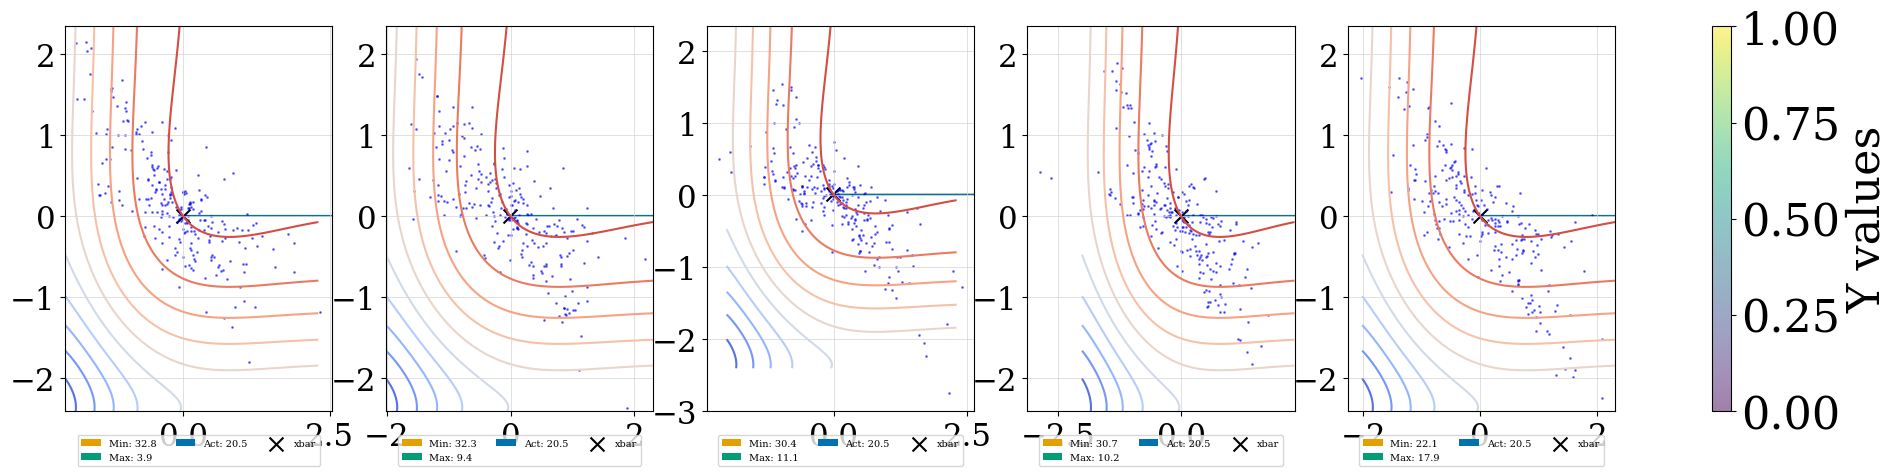

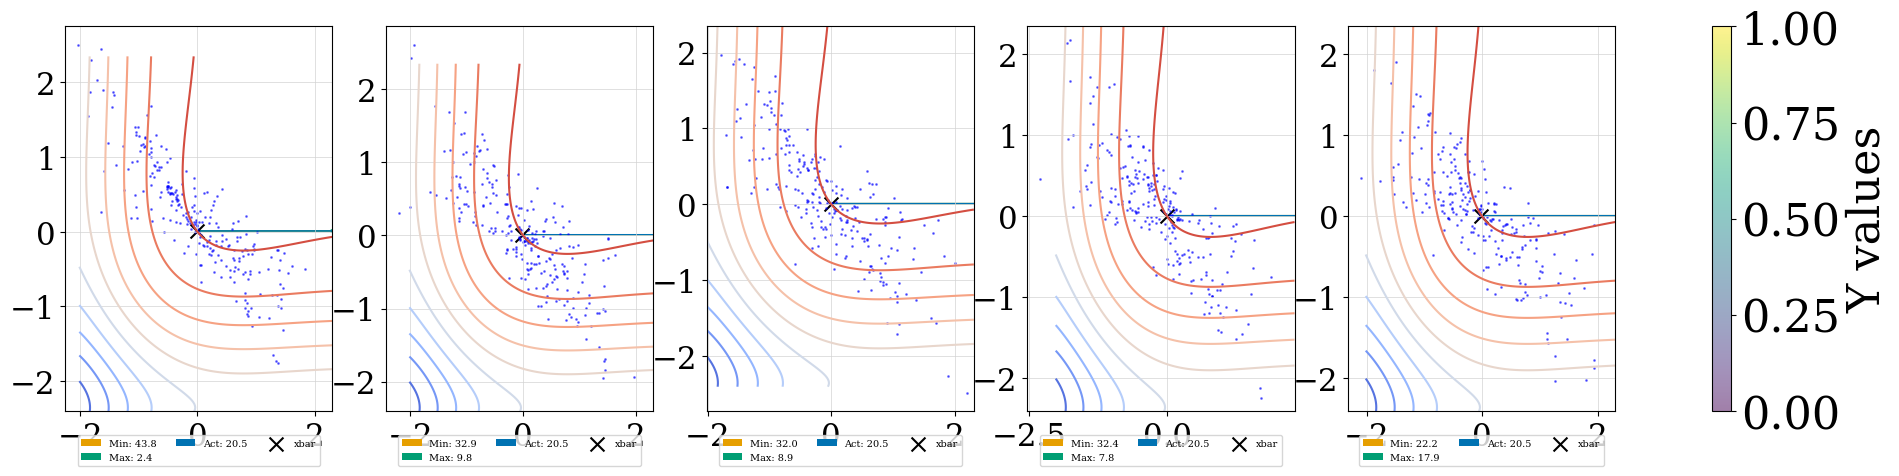

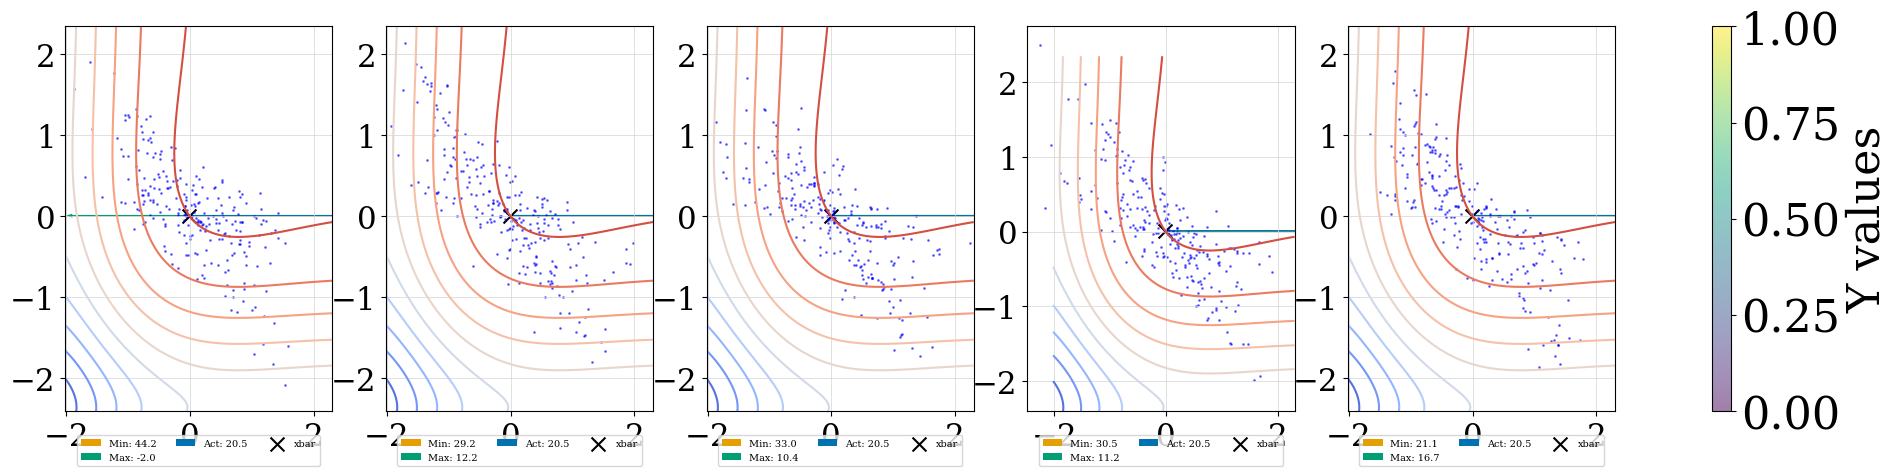

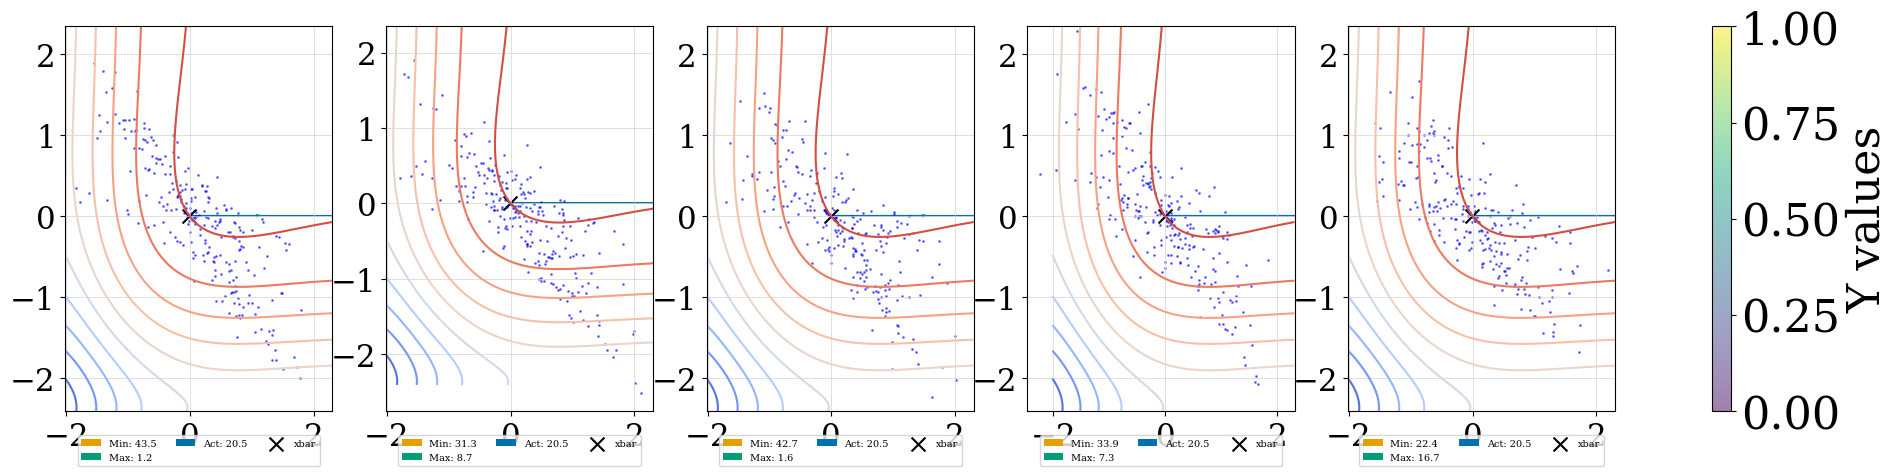

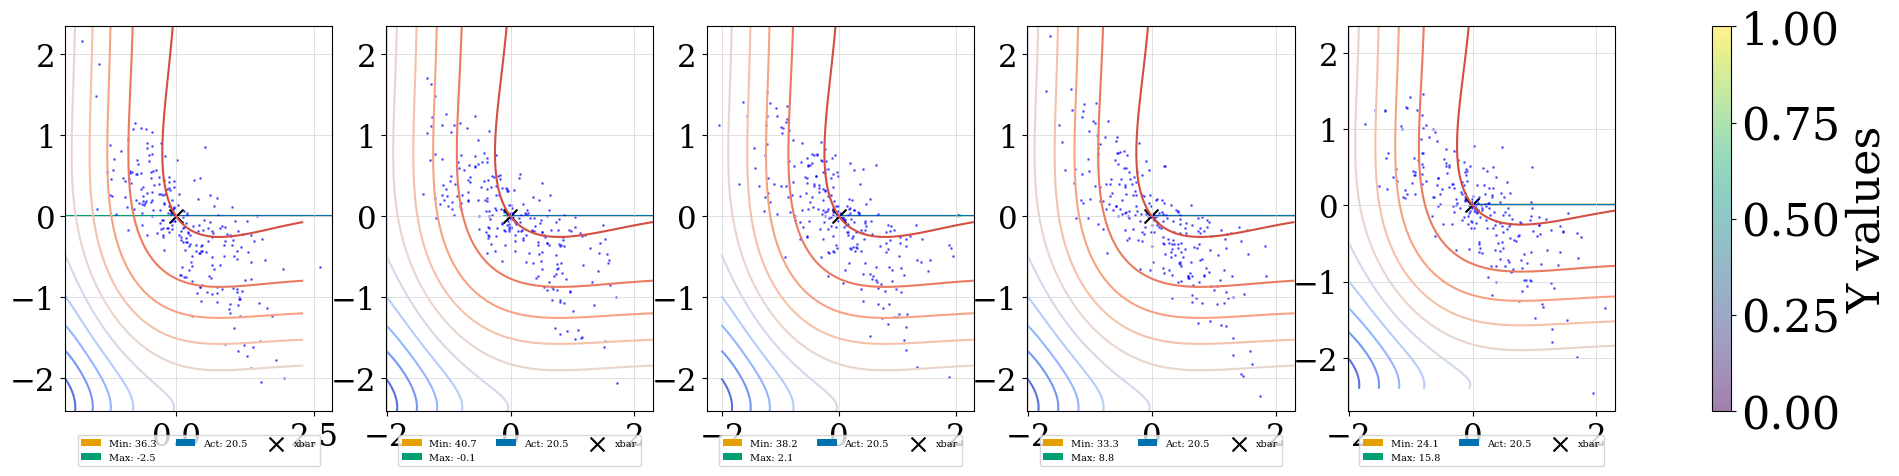

In [23]:
from visualization import *

strat = "Adaptive"
x_data = res[strat]["x_data"]
xbar = res[strat]["xbar"]
f_grid = res[strat]["f_grid"]
X1 = res[strat]["X1"]
X2 = res[strat]["X2"]
round_list = [0, 1, 5, 10, 15]
n_exploitation = 250


for step_size, lr in zip(np.arange(len(step_size_list)), step_size_list):
    lam_param = (lam_c, lam_first, lr)
    res_scatter = res_overall[lam_param]["res"]
    fig = visualize_iteration_debug(res_scatter[strat], round_list, lr, grad_true=grad_true[0], comp = 0, strat=strat, step_size=step_size)

    fig.show()

# Scatter Plot

In [67]:
from visualization import *

/var/folders/l8/w36jrnsd00d2lym3stgrplvr0000gn/T/ipykernel_5593/3414042149.py:11: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



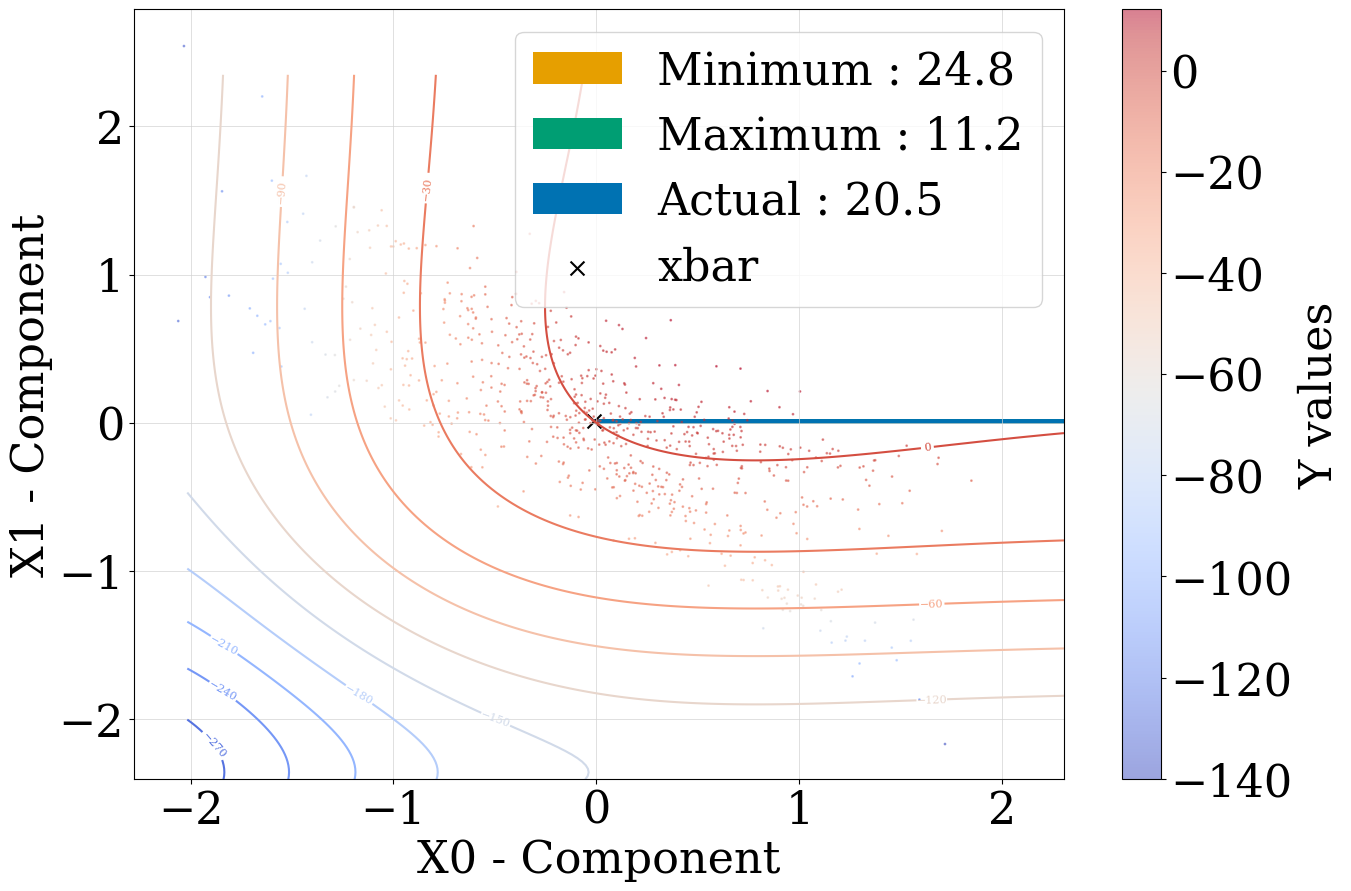

In [26]:
strat = "Explore-Exploit"
x_data = res[strat]["x_data"]
xbar = res[strat]["xbar"]
f_grid = res[strat]["f_grid"]
X1 = res[strat]["X1"]
X2 = res[strat]["X2"]

round = 2

fig = visualize_iteration(res[strat], round, n_exploitation= 250, grad_true=grad_true[0], comp = 0, figsize = (15,10), title = f"{strat} - Iteration {iteration}", strat=strat)
fig.show()

#fig = update_layout(fig)
fig.savefig(os.path.join(image_path, f"scatter_{strat}_{round}.pdf"), format='pdf')

/var/folders/l8/w36jrnsd00d2lym3stgrplvr0000gn/T/ipykernel_5593/1018557708.py:11: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



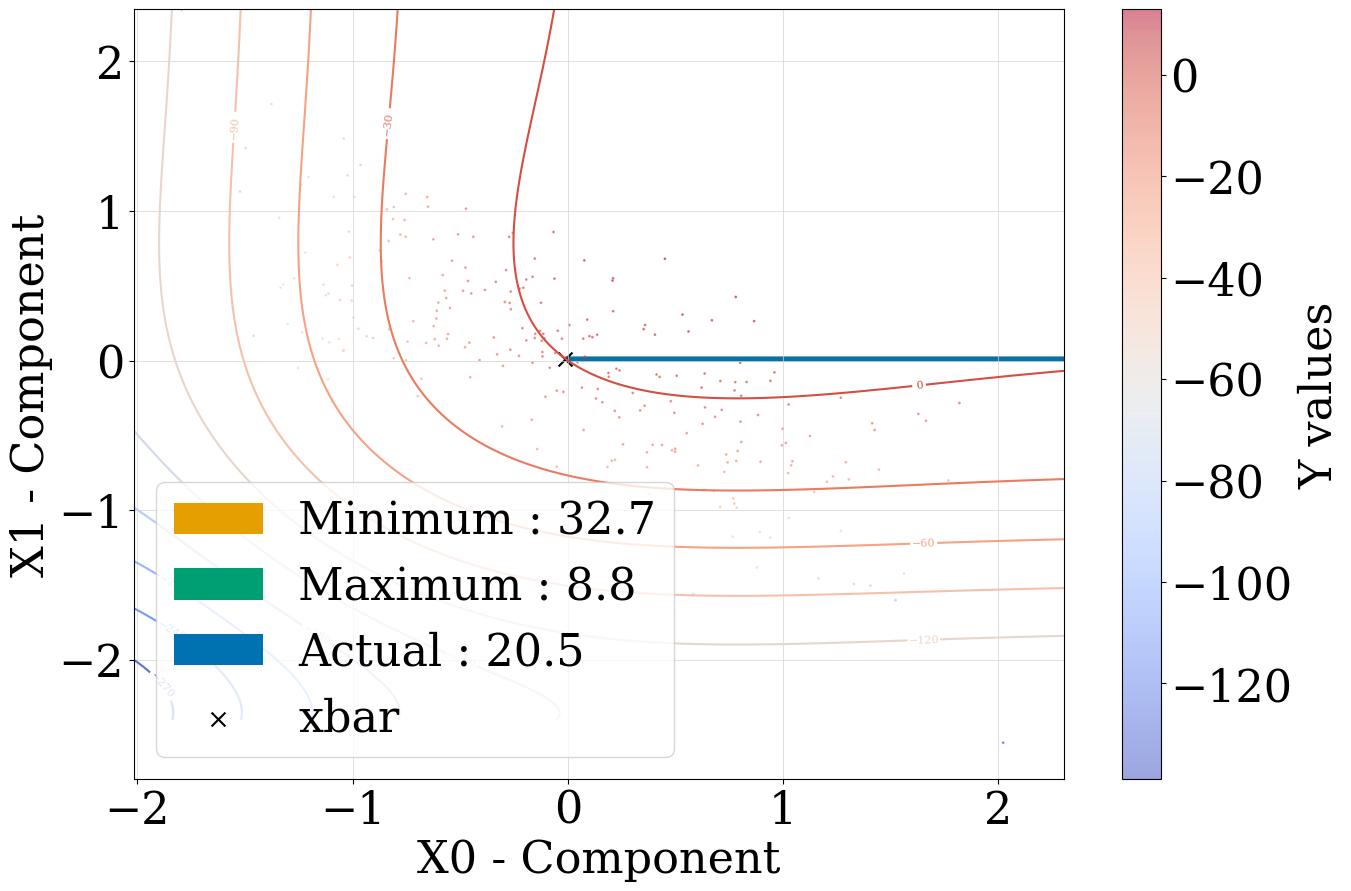

In [27]:
strat = "Adaptive"
x_data = res[strat]["x_data"]
xbar = res[strat]["xbar"]
f_grid = res[strat]["f_grid"]
X1 = res[strat]["X1"]
X2 = res[strat]["X2"]

round = 2

fig = visualize_iteration(res[strat], round, n_exploitation= 250, grad_true=grad_true[0], comp = 0, figsize = (15,10), title = f"{strat} - Iteration {iteration}", strat=strat)
fig.show()

#fig = update_layout(fig)
fig.savefig(os.path.join(image_path, f"scatter_{strat}_{round}.pdf"), format='pdf')

TypeError: plot_data_with_gradient_3d_surface() got an unexpected keyword argument 'avg_x_position'

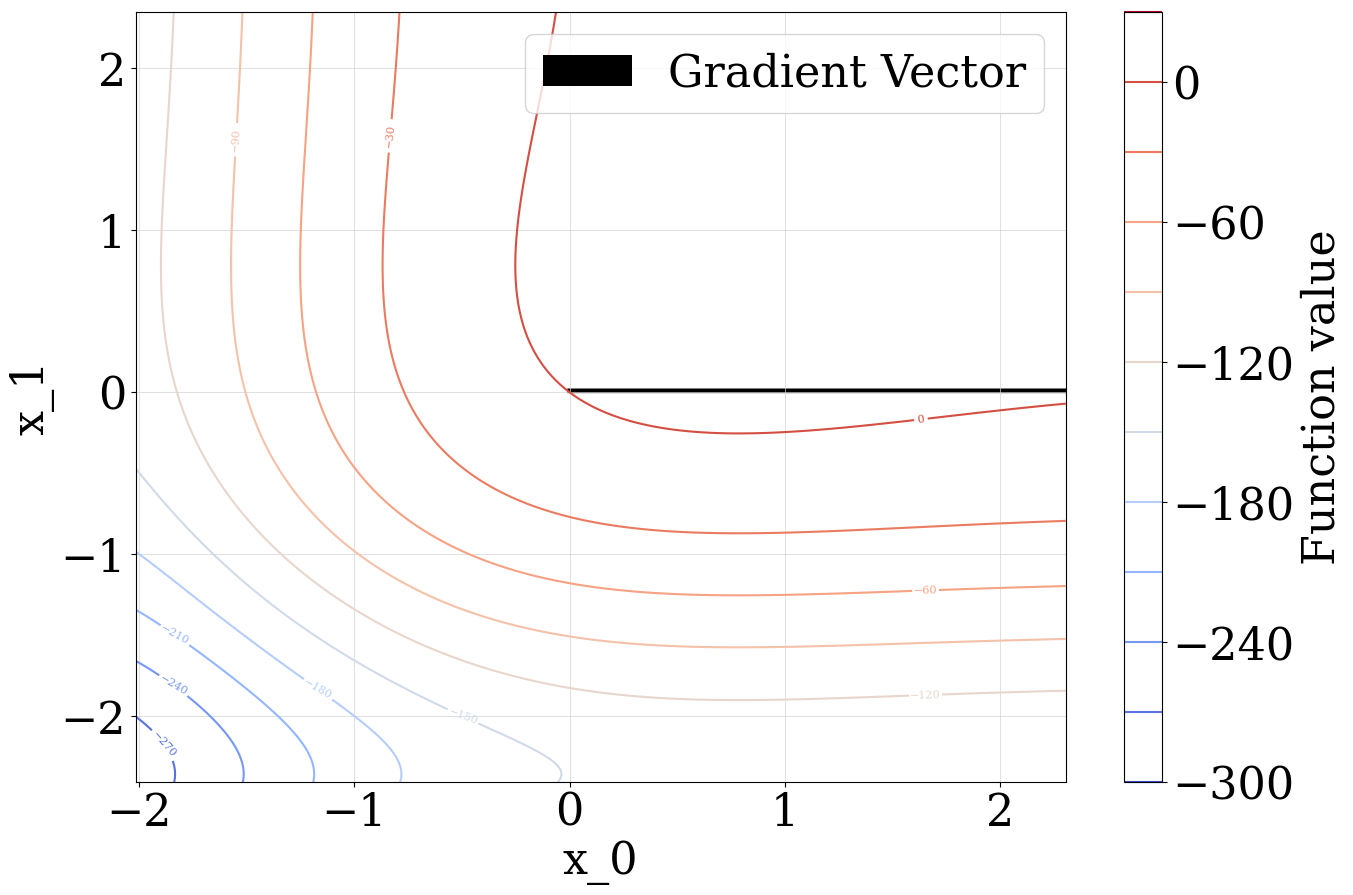

In [28]:
from visualization import *
# Visualization of the data
fig_2d, fig_surface = visualize_data(X1, X2, f_grid, xbar=xbar.squeeze(), grad_true=np.array([np.mean(grad_true), 0]))
fig_2d.savefig(os.path.join(image_path, "data_2d.pdf"))
fig_surface.savefig(os.path.join(image_path, "data_surface.pdf"))
#plt.close(fig_surface)